### Interpreting Models

**OBJECTIVES**

- Review Convolutional Neural Nets
- Investigate permuation importance
- Implement and interpret partial dependence plots
- Use shapley values to understand importance of features

In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.5 MB/s eta 0:00:00


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing, fetch_openml, load_digits
from sklearn.inspection import PartialDependenceDisplay, partial_dependence, permutation_importance

import shap

### Linear Regression Models

In [4]:
housing = fetch_california_housing(as_frame = True).frame

In [5]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Regression model

In [7]:
#train test split


In [8]:
#instantiate


In [9]:
#fit


LinearRegression()

In [10]:
#train score


0.6094773488960004

In [11]:
#test score


0.5958304450475889

In [12]:
#examine coefficients


,0
MedInc,0.433491
HouseAge,0.009573
AveRooms,-0.103240
AveBedrms,0.631825
Population,-0.000004
AveOccup,-0.003349
Latitude,-0.427121
Longitude,-0.438909


**Problem**: What feature mattered most?

In [11]:
#scaling of coefficients -- multiply by std of feature


### Fitting an ensemble model

In [17]:
#forest


In [18]:
#fit it


RandomForestRegressor(max_depth=5)

In [19]:
#train score


0.6854188134004187

In [20]:
#test score


0.6642339251968288

In [21]:
#feature importances?


,0
MedInc,0.745557
HouseAge,0.046066
AveRooms,0.016821
AveBedrms,0.001219
Population,0.002749
AveOccup,0.143182
Latitude,0.025484
Longitude,0.018921


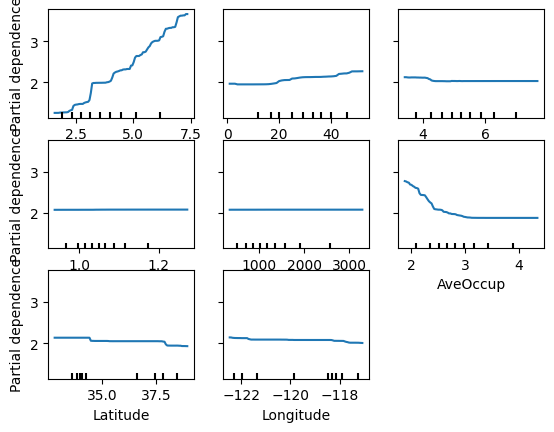

In [24]:
#partial dependence plot


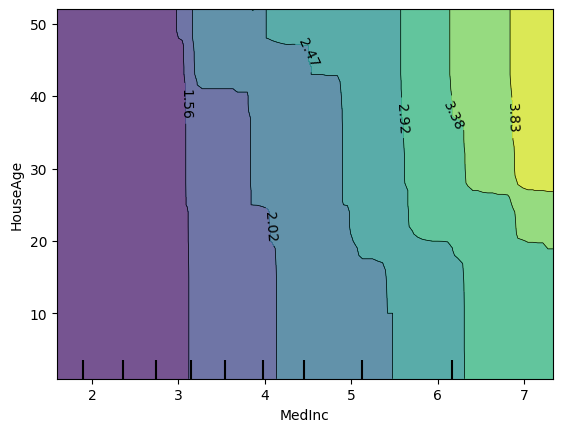

In [28]:
#2D version


In [29]:
#try with KNN


#### Individual Conditional Expectation

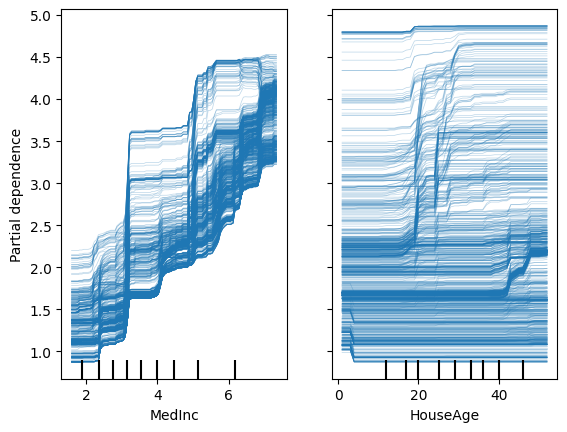

In [31]:
#ice plot


#### Permutation Importance

In [33]:
#permutation importance


In [34]:
#examine importances


{'importances_mean': array([1.08049179e+00, 5.80610592e-02, 1.37907837e-02, 5.82547711e-04,
        1.42162790e-03, 1.94106033e-01, 4.75354459e-02, 2.18663600e-02]),
 'importances_std': array([0.02316812, 0.00371048, 0.001079  , 0.0001192 , 0.00023555,
        0.00692512, 0.00307084, 0.00142193]),
 'importances': array([[1.05465724e+00, 1.05610312e+00, 1.10326417e+00, 1.08550128e+00,
         1.09128701e+00, 1.04485202e+00, 1.11080066e+00, 1.10988806e+00,
         1.08683393e+00, 1.06173040e+00],
        [5.62063604e-02, 5.81989579e-02, 5.99461578e-02, 4.98499427e-02,
         5.62440282e-02, 5.95182939e-02, 5.89437192e-02, 6.54850785e-02,
         5.90880899e-02, 5.71299634e-02],
        [1.27308896e-02, 1.43046571e-02, 1.20026109e-02, 1.48888707e-02,
         1.46820469e-02, 1.41334759e-02, 1.40956039e-02, 1.29726238e-02,
         1.26264513e-02, 1.54706068e-02],
        [5.12778694e-04, 7.05997293e-04, 4.95823012e-04, 8.55034462e-04,
         5.15792260e-04, 4.74717837e-04, 4.446634

In [35]:
#print the importance of each feature


1.0804917902569648
0.19410603303913976
0.058061059192682195
0.04753544586390063
0.021866359970544334
0.013790783684886954
0.0014216278990885622
0.000582547711010728


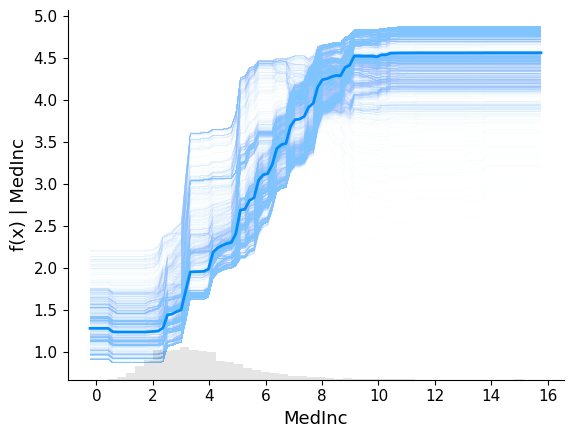

In [37]:
# shap.partial_dependence_plot("MedInc", tree.predict, X_test)

In [38]:
# explainer = shap.Explainer(tree.predict, X_test)

In [40]:
# shap_values = explainer(X_test)

In [ ]:
# shap.plots.waterfall(shap_values[sample_ind], max_display=14)

**Example**

Build a regression model to predict number of bike riders.  What features mattered most?

In [32]:
bike_sharing = fetch_openml(
    "Bike_Sharing_Demand", version=2, as_frame=True, parser="pandas"
)
df = bike_sharing.frame

In [33]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0,1


#### Practice with PyTorch

In [45]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor